# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [20, 104, 350]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,17546,4519,4602,1066,2259,2124
1,14100,2132,3445,1336,1491,548
2,3521,1099,1997,1796,173,995


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:** 

* 1. First Sample

Almost all the columns have more value than the average. But most predominntly we can see that **Fresh** products have a lot more orders than the average. But this has also a very high value of *Milk* and *Grocery*. This may mean that they are resellers or supermarkets who stock up products in huge.

* 2. Second Sample

Although we see a huge value in *Fresh* products, we don't see that trend in other cases. This may mean that they might be restaurants who need fresh food each day but no stocking up products like mall.

* Third Sample

All the values are small but still *Fresh* is largest. This may mean a small restaurant or kiosks.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

dropped_feature = 'Frozen'
new_data = data.drop(dropped_feature, axis=1)
label = data[dropped_feature]

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, label, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)

print score

-0.210135890125


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:** I attempted to predict the feature **Frozen** and reported prediction score is -0.21. This negative score indicates that there is no correlation between the other features and the feature Frozen. Or in other words we can not predict the feature Frozen from other features and hence this feature can't be removed permanently.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/home/mayukh/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


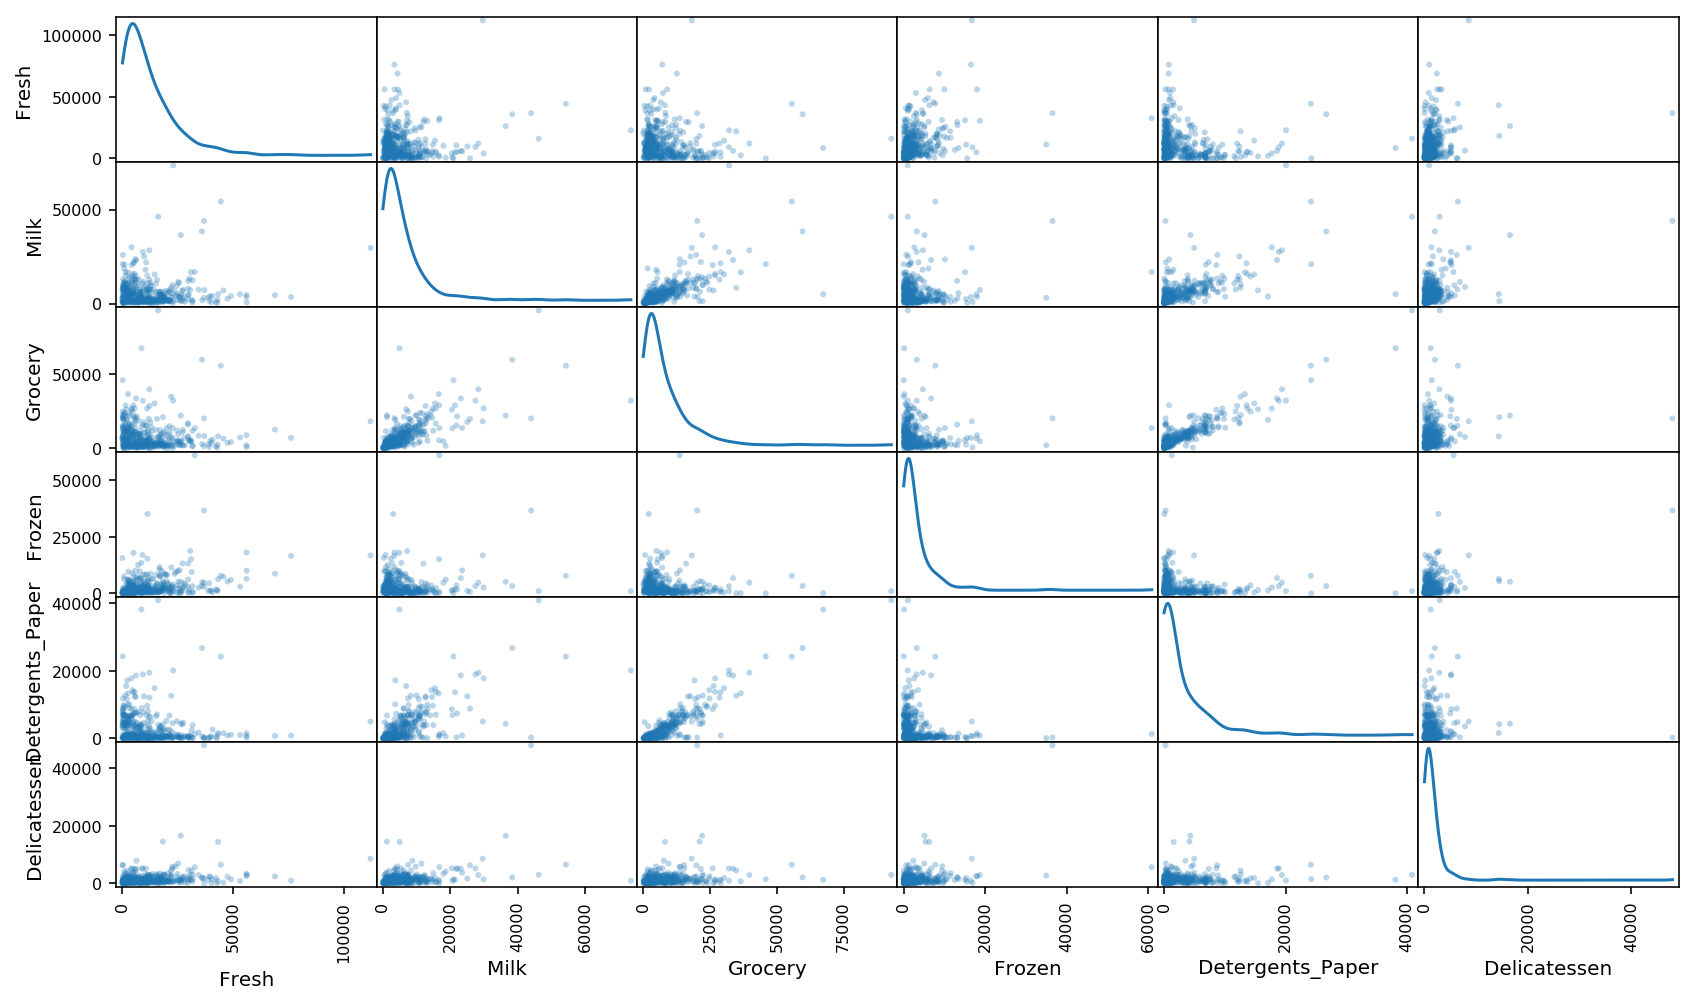

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

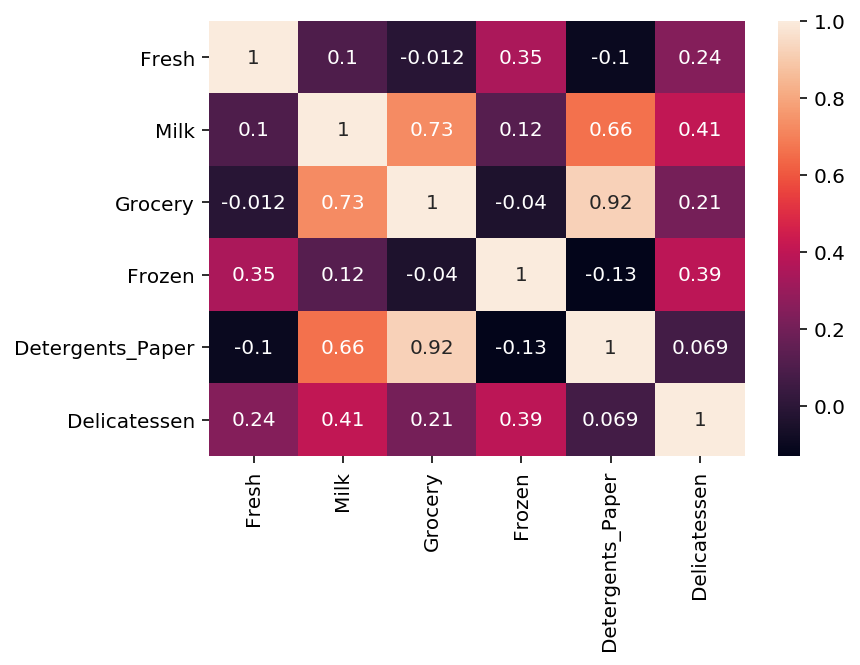

In [6]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True);

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**  We can see that from the above kde distribution, most of the variables are highly skewed and they seem to have a lot of outliers. None of the variables are normally distributed. In terms of high correlation, 
    **Grocery** and **Detergent_paper** have high correlation followed by **Milk** and **Grocery**. We can also see that maximum correlation with **Frozen** product is with **Delicatessen** of 0.39. This is not too much. This proves that **Frozen** is really not correlated with anything much and hence it can not be removed.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/home/mayukh/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


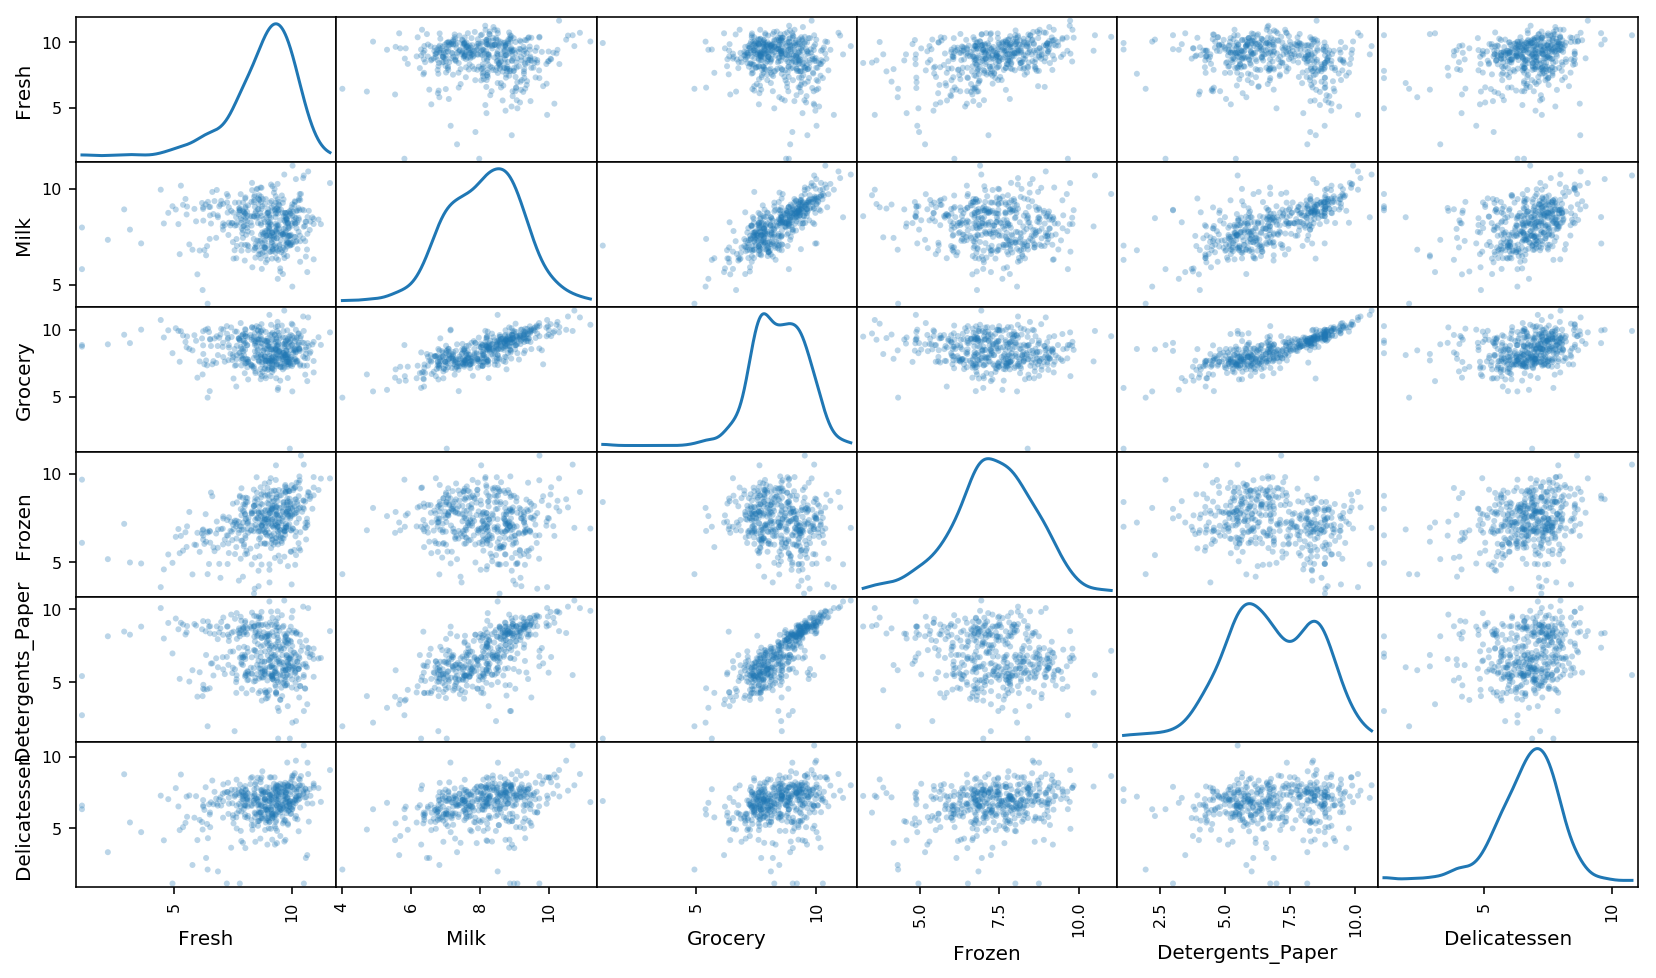

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.772581,8.416046,8.434246,6.971669,7.722678,7.661056
1,9.553930,7.664816,8.144679,7.197435,7.307202,6.306275
2,8.166500,7.002156,7.599401,7.493317,5.153292,6.902743


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
# For each feature find the data points with extreme high or low values
outliers  = set() # we are using set because of duplicate index

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25.0)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75.0)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    IQR = Q3 - Q1
    step = IQR * 1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outliers_points = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outliers_points)
    outliers.update(outliers_points.index.tolist())
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers = list(outliers)
# print outliers
# # Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print "Current dataframe has {} entries and {} entries were removed".format(good_data.shape[0], len(outliers))

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Current dataframe has 398 entries and 42 entries were removed


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

Data with index **65** is present in *Frozen* and *Fresh*

Data with index **154** is present in *Milk* and *Grocery*

Data with index **66 & 128** is present in *Delicatessen* and *Fresh*

Data with index **75** is present in *Detergent_Paper* and *Grocery*

and so on..
Outlier needs to be removed while doing clustering otherwise they might shoot off the cluster centers and can change the cluster regions to create major anamolies in detecting regions. Moreover while doing PCA, we try to capture data along the maximum variance. This maximum variance line can change due to even a single outlier too. Hence removing the outliers is important.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

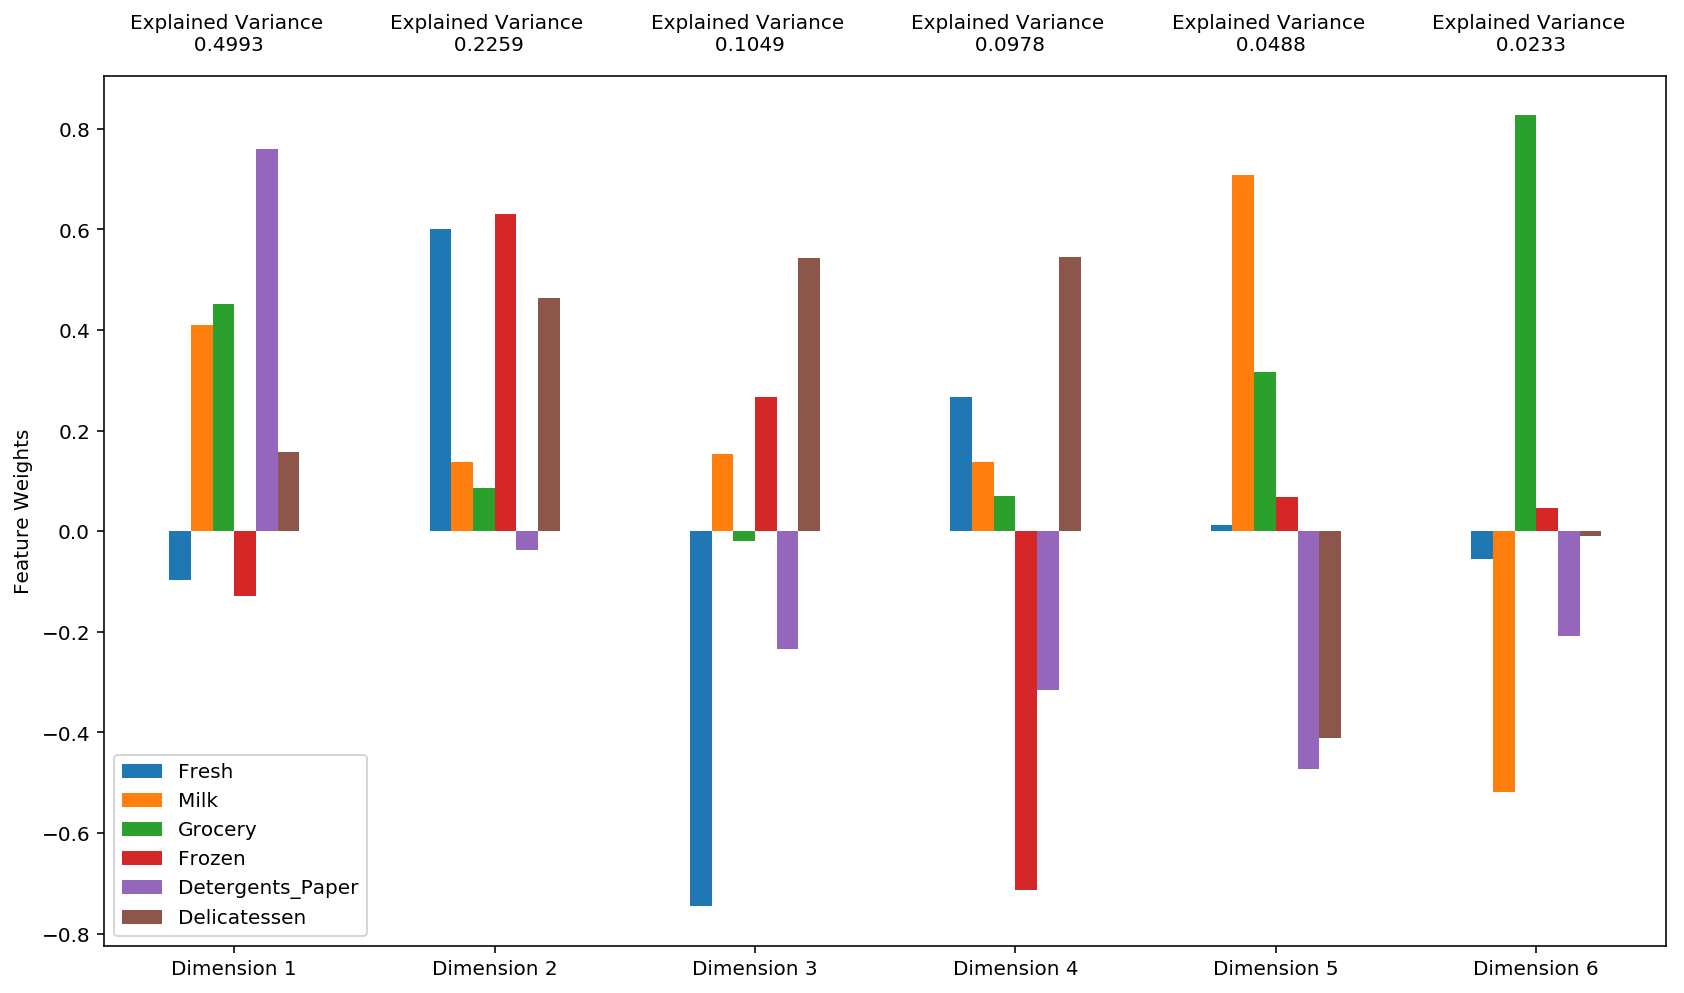

In [10]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(good_data)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

In [30]:
pd.DataFrame(pca_results['Explained Variance'].cumsum() * 100)

,Explained Variance
Dimension 1,49.93
Dimension 2,72.52
Dimension 3,83.01
Dimension 4,92.79
Dimension 5,97.67
Dimension 6,100.00


**Answer:**

- The first and second principal components explains **49.93% + 22.59% = 72.52** variances. 

- The first 4 principal components explains **92.79%** variances. 

The most important feature of PCA scores is in their relative sign. PCA itself doesn't tell you anything but the opposing signs of different features in a feature list shows that the particular component can separate out those datapoints where these two features have same sign vs different sign. With this notion, we can say following about different features

- The 1st principal component as ususal explains most of the variances. We can see that *Detergents_Paper* being explained a lot while *Frozen* or *Fresh* are not being explained much. We overall 4 out of 6 features are being explained by the first component of the PCA. Interestingly the most explained feature called *Detergent_Paper* is not at all explained by any other principal components. This means all the explaining is done by 1st principal component.

- The 2nd principal component is doing a pretty good job in balacing out the explanation of most of the variables. *Frozen*, *Fresh* & *Delicatessen* is being explained very nicely. Infact *Fresh* is being explained mostly by the 2nd principal component.

- Principal component 6 has very low explained variance but it explains the *Grocery* variable quite nicely. Although it can not explain any other variables properly. This makes sense looking at the low variace score.

- Principal component 5 explains *Milk* & *Grocery* quite nicely and it seems that it can be used in place of PC6.

- Both PC2 and PC3 seems to have pretty moderate effect in explaining the variables as it seems although explaining *Delicatessen* it does some decent job.

- One interesting thing about dimention 3 is that *Delicatessen* and *Fresh* has opposite signs. This means this dimension can separate the data points. So if customer type is very much dependent/split between *Delicatessen* and *Fresh*, then this dimension can be very helpful. Same thing is for Dimension 6 where *Grocery* and *Milk* seems to have significant and having opposite signs. This can be important with a same notion as dimension 3 was.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [11]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.9509,0.6209,-0.4557,0.7648,-0.6039,-0.4094
1,-0.0254,-0.1080,-0.9796,-0.1849,-0.4604,-0.1382
2,-1.9879,-0.5349,0.8714,0.1089,-0.3256,0.2858


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.128,0.7595,0.1579
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.630,-0.0376,0.4634


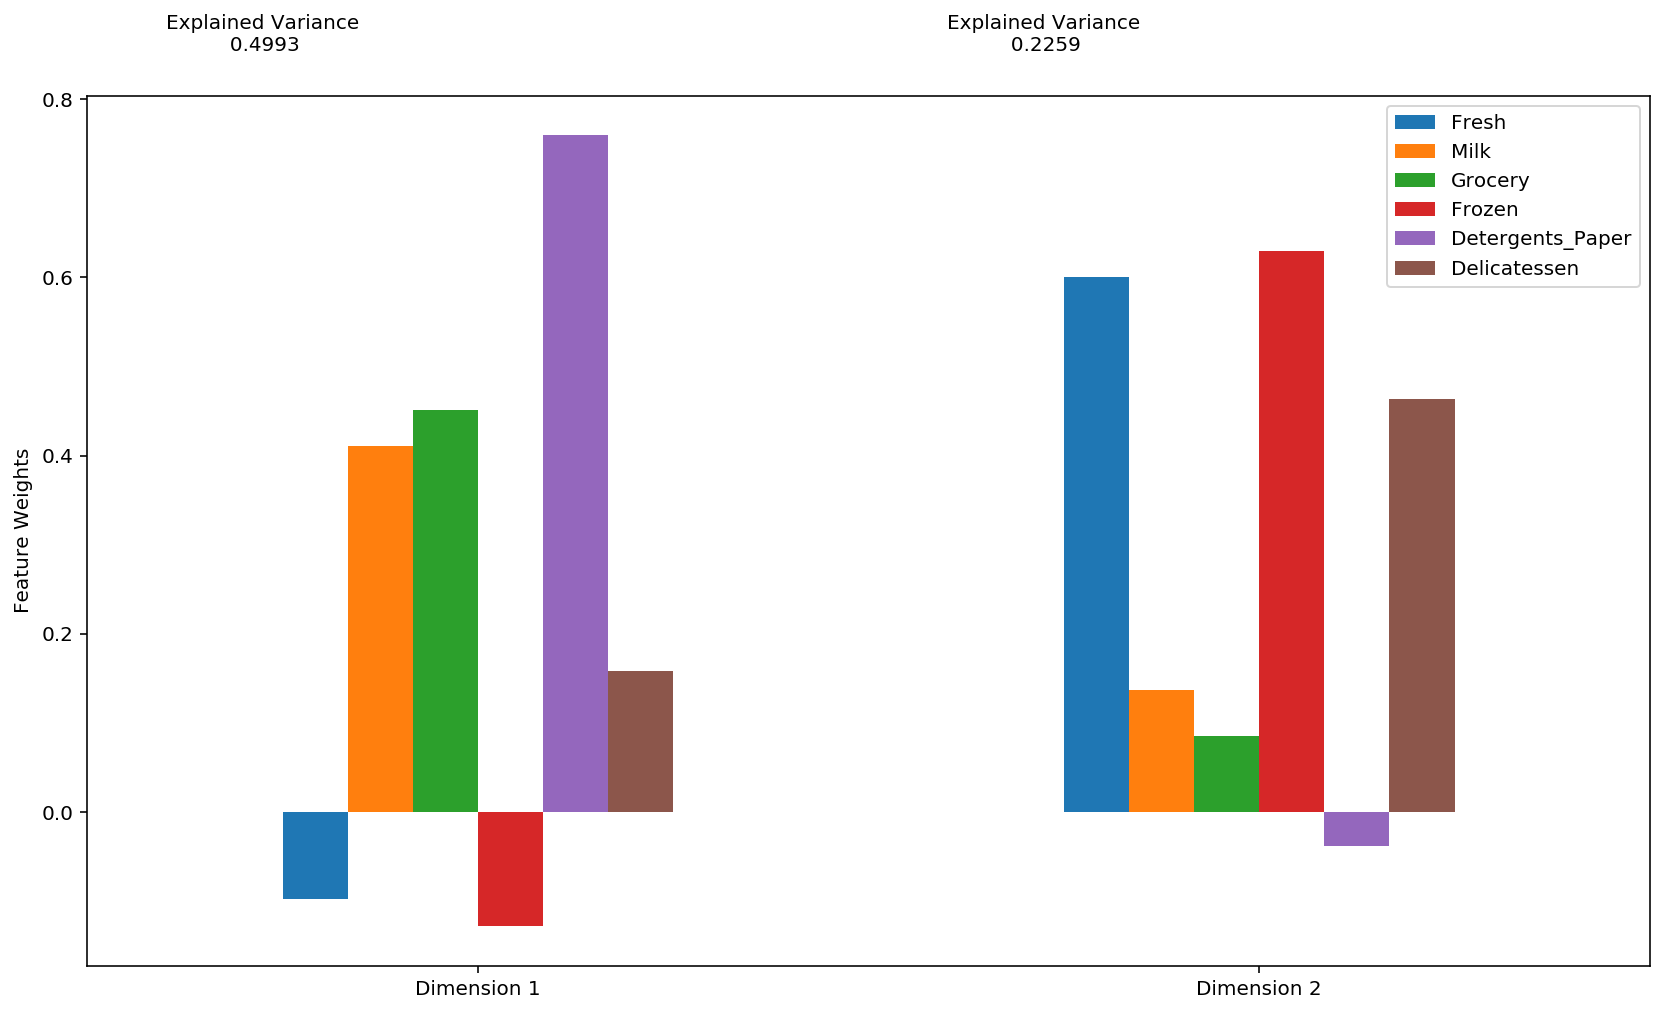

In [12]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.fit_transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
vs.pca_results(good_data, pca)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [13]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.9509,0.6209
1,-0.0254,-0.1080
2,-1.9879,-0.5349


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

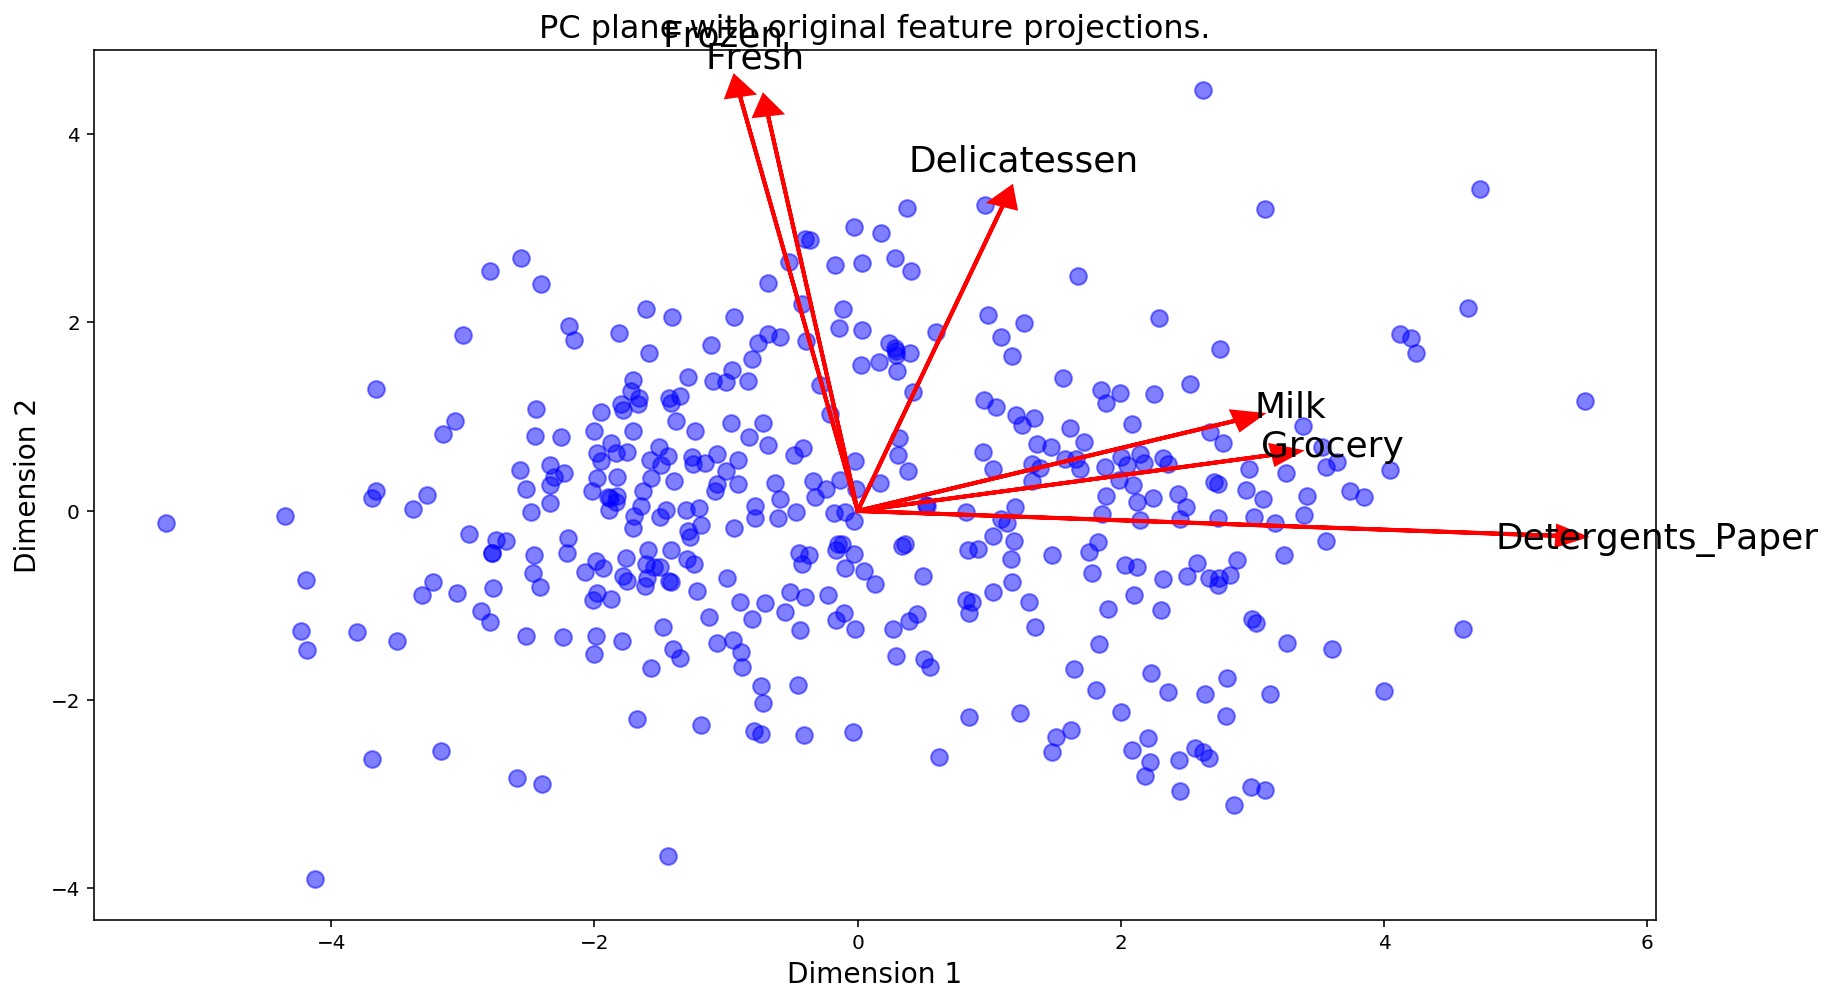

In [14]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer:** With the first component we can see that the 3 most associated features are *Milk*, *Grocery* & *Detergents_Paper* while highly associated features with the 2nd component is *Frozen* and *Fresh* and finally *Delicatessen* is explained partially by both first component and the second component.

And yes we can even verify this finding from the above plot for 2 components of PCA.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:** 

- K-Means Clustering is a kind of hard clustering. We can mainly use it when the features are linearly separable or in other words there is a clear separation between different cluster regions. This means we can draw a clear conclusion that a particular point belongs to a particular region. K-Means clustering in sklearn according to the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) has only one parameter to decid which we can change to create and fit the classifier.


- Gaussian Mixture Model or more commonly known as Soft clustering is basically logistic regression of Unsupervised Learning. Instead of classifying points to a particular region, it pops out probablities for a point being form a particualar cluster. This is both good and bad. It is good beacuse it also accommodates the points that are ambiguous in nature or in other words that can not be classified to a particular cluster region. It is also bad because even when the classification is very clear, it gives probabilities which is cumbersome sometimes and slow too.

**My choice:** I shall be going forward with GMM or GausianMixtureModel because of the following reasons

- In K-Means clustering, we compute the points likelihood for a cluster permanently. But this is helpful while having a lot of data with so many features. K-Means in this case runs very quickly. But here we have a small number of entries with only 6 features and hence Gaussian Mixture would not be computationally intensive.

- Getting probability instead of hard clustering is always good because unlike hard clustering, it assumes the data not to follow any specific shape or pattern. K-Means assusmes the data around it in a spherical region. In our case we don't know that if our data is linear or not. Hence it is best to use Gaussian Mixture model to get rid of that confusion.

- Finally as already discussed, so points are ambiguous and their hard prediction is can sometime be inaccurate and hence we soft clustering is always safe so that at later stage we can change the threshold value according to our business requirement to predict any point into a cluster.



### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [15]:
# TODO: Apply your clustering algorithm of choice to the reduced data
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def grid_serach(cluster_centers=2):
    clusterer = GaussianMixture(n_components=cluster_centers, random_state=42)
    clusterer.fit(reduced_data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    # TODO: Find the cluster centers
    centers = clusterer.means_
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    return {'score': score, 
            'centers': centers, 
            'prediction': preds, 
            'sample_pred': sample_preds}

scores = []
for centers in range(2, 11):
    scores.append(grid_serach(cluster_centers=centers).get('score'))

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

The report for scores for different cluster centers are displayed below. Of these we are getting highest score while using 2 cluster centres and this is obvious because we are using 2 PCA compoenets.

In [16]:
pd.DataFrame({'score': scores, 'cluster_centres': range(2, 11)}).set_index('cluster_centres')

,score
cluster_centres,
2,0.447412
3,0.361194
4,0.318253
5,0.313057
6,0.340604
7,0.329661
8,0.329122
9,0.262685
10,0.299580


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

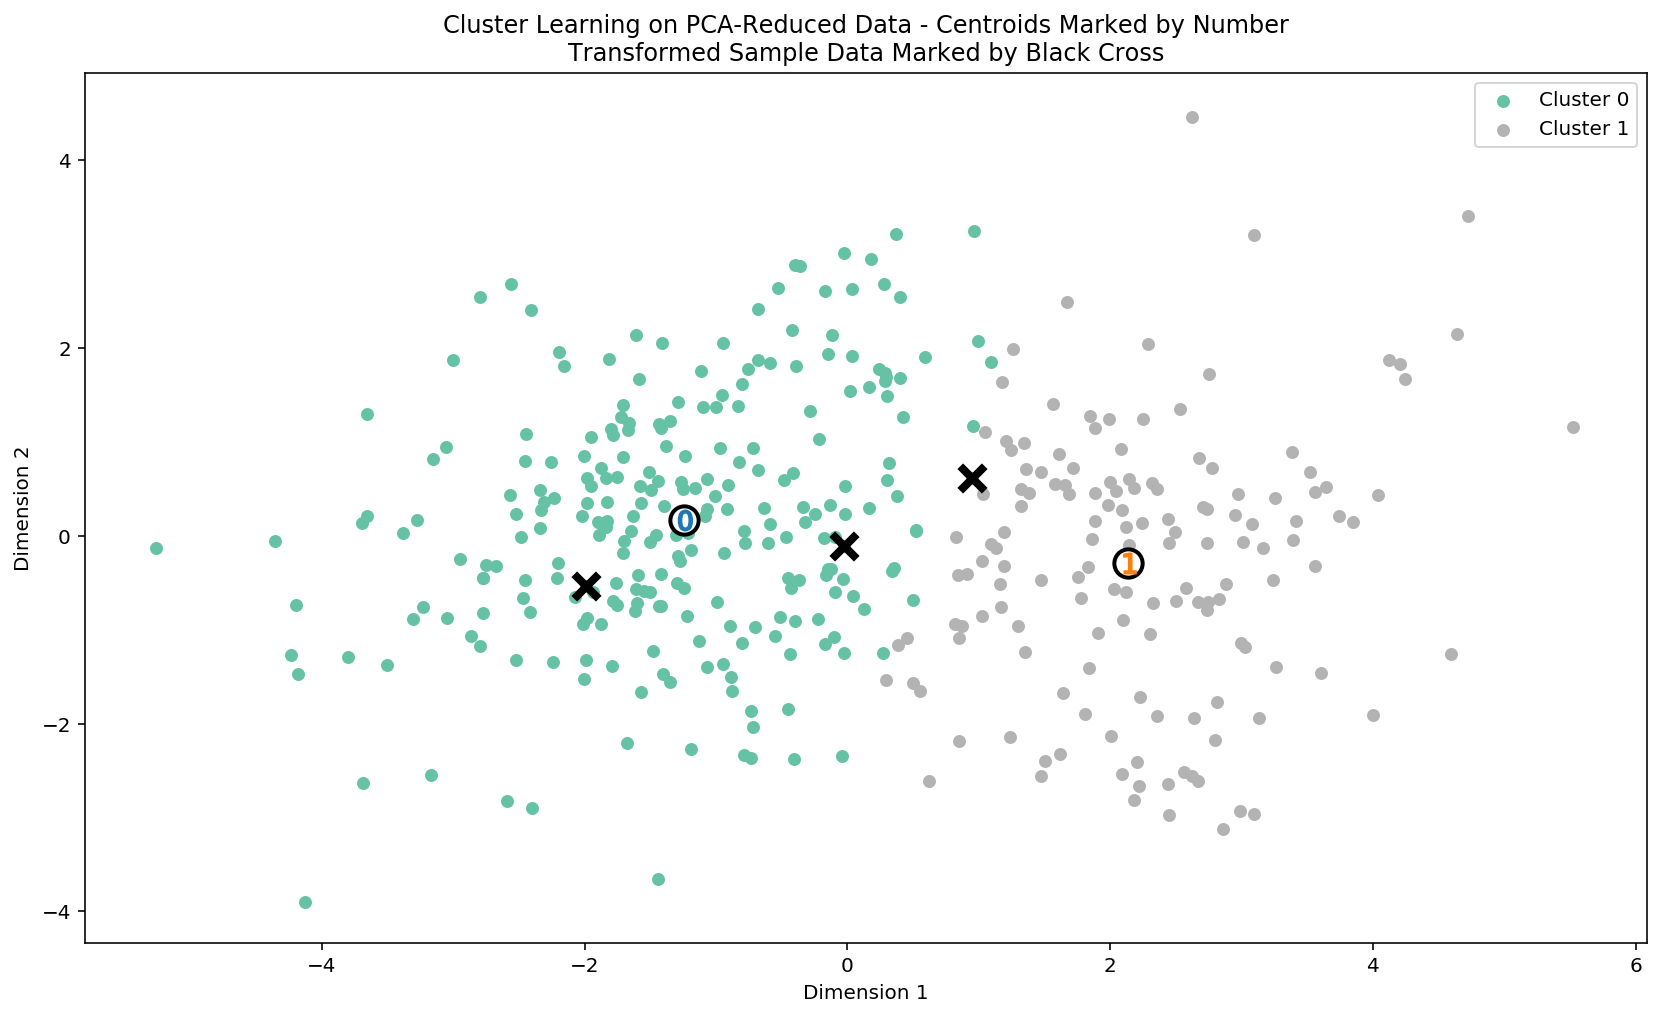

In [17]:
# Display the results of the clustering from implementation
result = grid_serach()
preds = result['prediction']
centers = result['centers']
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [18]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9468.0,2067.0,2624.0,2196.0,343.0,799.0
Segment 1,5174.0,7776.0,11581.0,1068.0,4536.0,1101.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

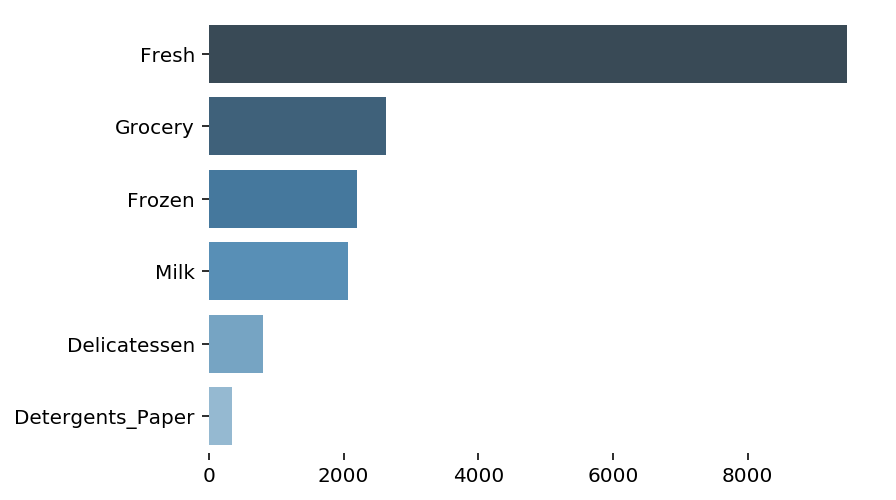

In [19]:
seg1 = true_centers.iloc[0]
seg1.sort_values(ascending=False, inplace=True)
seg2 = true_centers.iloc[1]
seg2.sort_values(ascending=False, inplace=True)
sns.barplot(x=seg1.values, y=seg1.index, 
            palette='Blues_d', orient='h')
sns.despine(left=True, bottom=True)

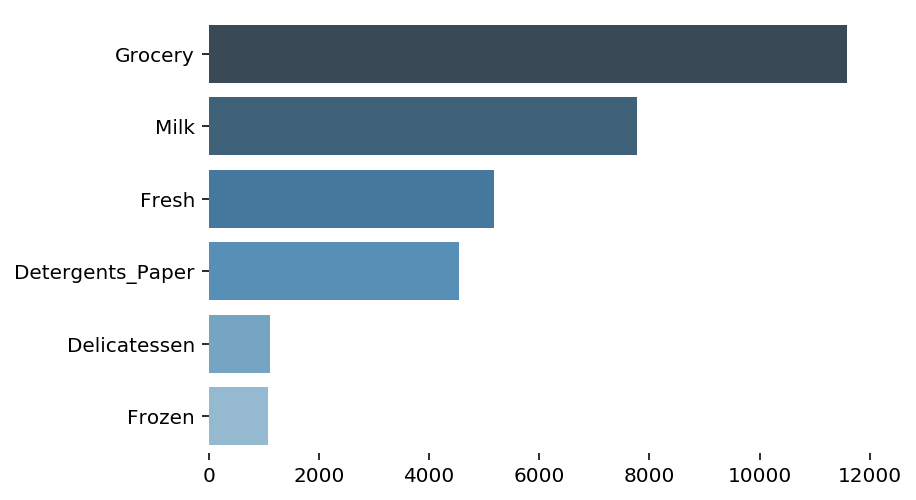

In [20]:
sns.barplot(x=seg2.values, y=seg2.index, 
            palette='Blues_d', orient='h')
sns.despine(left=True, bottom=True)

In [18]:
data.quantile(q=0.35)

Fresh               5250.00
Milk                2174.30
Grocery             2851.10
Frozen               953.25
Detergents_Paper     396.30
Delicatessen         628.00
Name: 0.35, dtype: float64

In [3]:
data.median()

Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
dtype: float64

**Answer:** 

As we can see that for **Segment 0**, *Fresh* food order is too high this Indicates that all the points in cluster 0 actually belongs to some restaurant or some other place where fresh food being delivered. For reference with the stats, let's look at the median of *Fresh*  for population being **8504.0** and the actual value for the cluster center is **9468.0**. This shows higher than the median value. Which emphasises it more that the region surrounding this cluseter region predominantly have more *Fresh* purchase which may mean they are restaurants.

For the **Segment 1** all the points that are inside the cluster 1 shows a very high-value of *Grocery* and *Milk*. This may indicate some shopping mall or some big shops or some storage where they're stocking all the products in bulk. Again refering with the median values we can see that *Fresh* purchase of **5174.0** for this cluster center is a lot lesser than the median value and a little bit lesser than 35th Quantile of **5250.0** but *Milk*, *Grocery*, *Detergent_Paper*, *Frozen* all are more or a lot more than the median. This definitely indicates that this cluster points are more like retailers stocking products.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [21]:
sample_preds = result['sample_pred']
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


In [22]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,17546,4519,4602,1066,2259,2124
1,14100,2132,3445,1336,1491,548
2,3521,1099,1997,1796,173,995


**Answer:**
20, 104, 350

We have already assumed and predicted the type of customers for each of the samples while answering Q1. Now let's look at them one by one. 

- **Index 20:** 
    - **_Previous Assumtion_**: The entry is definitely of type Mall or retailer because of such an high value of *Milk* and *Grocery* products.
    - **_Prediction_**: The prediction shows that this point belongs to cluster 1 which may mean that this point belongs to Retailers or Mall.
    - **_Intution_**: The reason that this belongs to a probable mall category. The reason I say probable because this has also a very high value of *Fresh* purchase too. This may indicate to the fact that this can be also a restaurant serving fresh food. Moreover we are also using GMM instead of KNN. This leaves a certain chance of belonging to the other category too. But still the high values of *Milk* and *Grocery* indicates that this can be a retailer.
    
- **Index 104:** 
    - **_Previous Assumtion_**: The entry is definitely of type Restaurant because of such an high value of *Fresh* food but  comparatively lower value of *Grocery* & *Milk* products.
    - **_Prediction_**: The prediction shows that this point belongs to cluster 0 which may mean that this point belongs to Restaurant.
    - **_Intution_**: As already discussed, this point belogs to the restaurant category because we can see a lot of *Fresh* product purchase even more than the average of *Fresh* for the population of 12,000 but the other category purchases are a lot smaller. This can mean that they may not be retailers and perdiction also shows the same.


- **Index 350:** 
    - **_Previous Assumtion_**: The entry is probably of type Restaurant or specially a small restaurant or kisok because of higher value of *Fresh* food but  comparatively lower value of *Grocery* & *Milk* products.
    - **_Prediction_**: The prediction shows that this point belongs to cluster 0 which may mean that this point belongs to Restaurant.
    - **_Intution_**: This is also a small restaurant as it was rightfully shown by the prediction. The reason it is a small restaurant is because of the fact that althought the *Fresh* food purchase is more than other purchases which may mean it is a retailer but all the purchases are lot lesser than the average of population prices.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

All customers can not be treated equally. Here also we can see that we mainly have 2 types of customer

1. Restaurants - Who may want almost all 5 days supply of food because they want to serve their customers fresh. Moreover they may not most of the time have that large facility to store all the food for the next day. Hence switching to 3 day model may create problems for them.

2. Retailers - They store all the products and they can stock up and hence they may not require all 5 day sincere delivery and delay can be compensated. Hence 3 day model may be effecitive for them.

For A/B testing a sample form both group can be taken and tested independently so that we can evalute how people are recieveing it. This is far more better than generalizing the customers.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

This is actually a classic use Unsupervised Learning algorithms to use for Supervised tasks at later stages. Once we have this data from unsupervised KMeans, we add a new feature to the dataset called **customer_segment** and we assign the cluster center. Now we use this column as label to the supervised dataset. Any Supervised Machine Learning algorithm can then use this labeled data to train itself and then use this model to predict customer segment for 10 newly acuired customers.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

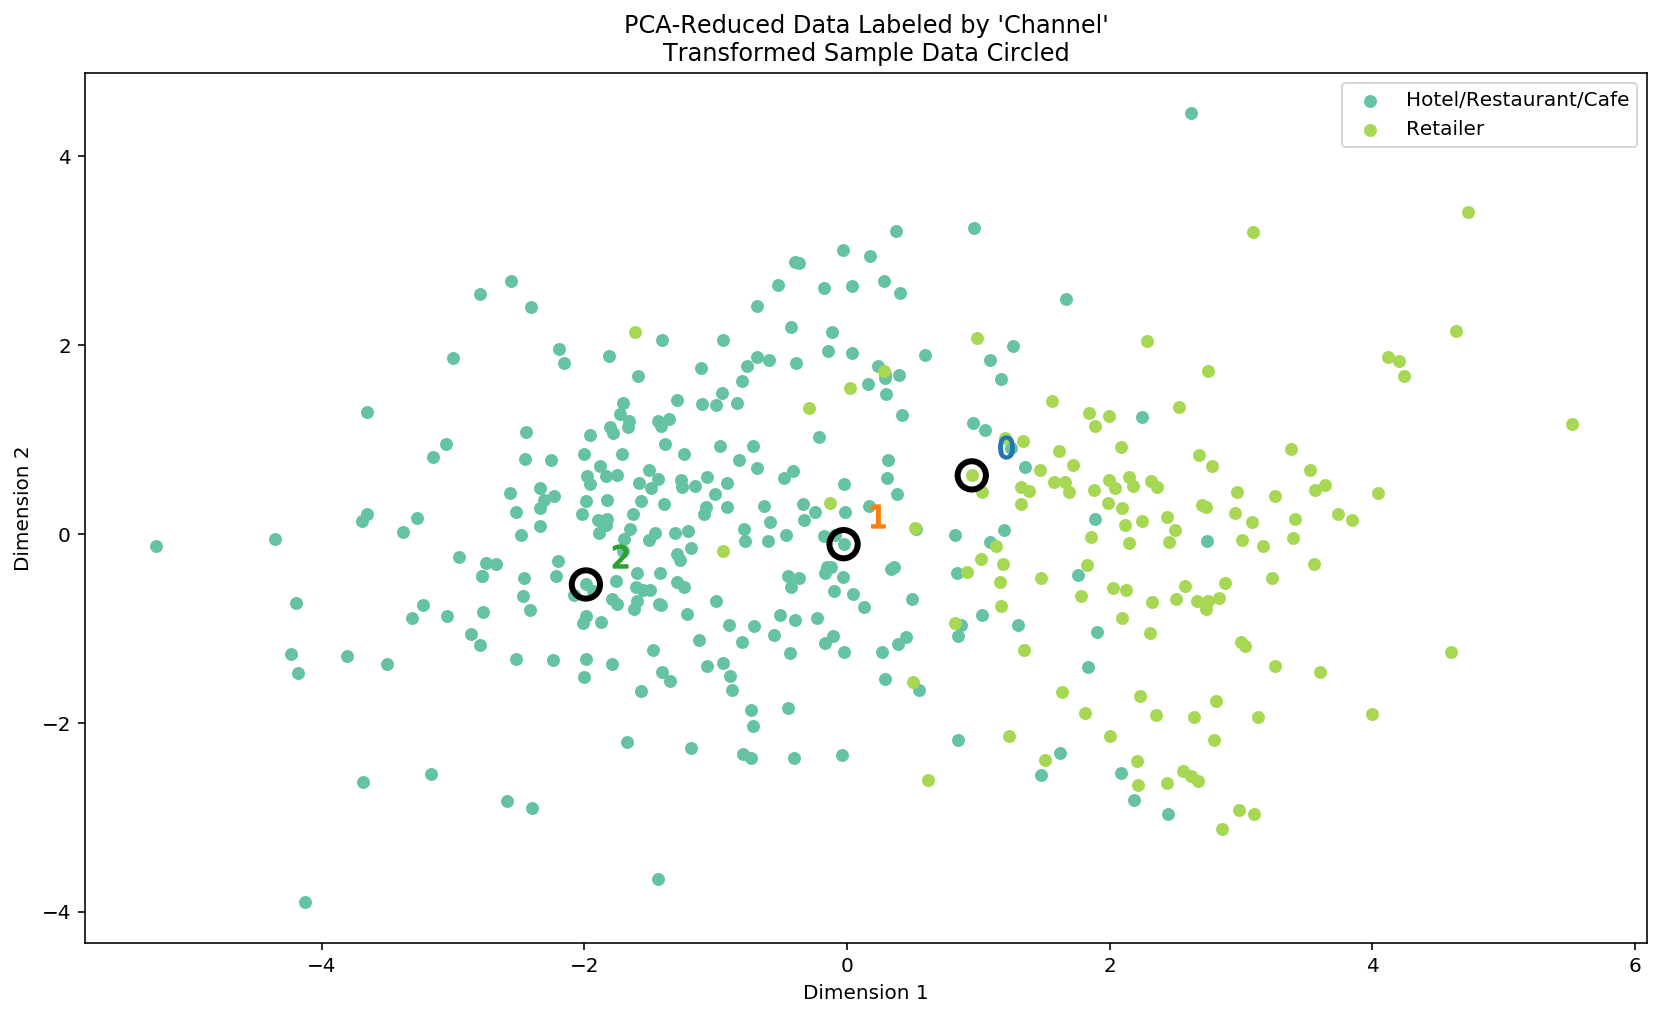

In [23]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

This is awesome because even in the real dataset also, the first point is being treated as Retailer in Cluster 1 while the 2nd and 3rd point is treated as Restaurants in Cluster 0. This means removing 'Channel' and 'Region' doesn't affect much.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.